In [404]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [405]:
melbourne_data_path = 'data/Melbourne_housing_FULL.csv'
melbourne_df = pd.read_csv(melbourne_data_path)
melbourne_df = melbourne_df.dropna(axis=0, how='any')

# Review the data
Use the command you learned to view summary statistics of the data. Then answer the following questions.

In [406]:
melbourne_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8887.000000,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.092902e+06,11.199887,3111.662653,3.078204,1.646450,1.692247,523.480365,149.309477,1965.753348,-37.804501,144.991393,7475.940137
std,0.963786,6.793819e+05,6.813402,112.614268,0.966269,0.721611,0.975464,1061.324228,87.925580,37.040876,0.090549,0.118919,4375.024364
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,249.000000
25%,2.000000,6.410000e+05,6.400000,3044.000000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858560,144.920000,4382.500000
50%,3.000000,9.000000e+05,10.200000,3084.000000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998500,6567.000000
75%,4.000000,1.345000e+06,13.900000,3150.000000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748945,145.064560,10331.000000
max,12.000000,9.000000e+06,47.400000,3977.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


What is the average lot size (rounded to nearest integer) ?

In [407]:
avg_lot_size = melbourne_df['BuildingArea'].mean()
print(round(avg_lot_size))

149


As of today, how old is the newest home (current year - the date in which it was built)

In [408]:
melbourne_df['YearBuilt'] = melbourne_df['YearBuilt'].astype(int)
newest_home_age = 2020 - melbourne_df['YearBuilt'].max()
print(newest_home_age)


1


In [409]:
after_2000 = melbourne_df[['Price', 'YearBuilt']]
after_2000 = after_2000[after_2000['YearBuilt'] >= 2000].groupby('YearBuilt').mean()
print(after_2000)

                  Price
YearBuilt              
2000       1.013125e+06
2001       9.217264e+05
2002       8.712931e+05
2003       8.709397e+05
2004       8.437944e+05
2005       9.438133e+05
2006       1.003954e+06
2007       9.803005e+05
2008       9.679899e+05
2009       9.801041e+05
2010       9.293823e+05
2011       8.852242e+05
2012       9.221704e+05
2013       9.567384e+05
2014       9.277583e+05
2015       1.242291e+06
2016       1.415751e+06
2017       1.100939e+06
2018       1.099500e+06
2019       1.100000e+06


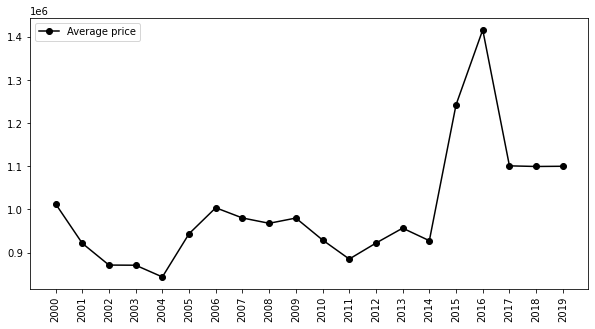

In [410]:
years_after_2000 = after_2000.index.tolist()
plt.figure(figsize=(10, 5))
plt.plot(
    years_after_2000,
    after_2000['Price'],
    marker='o',
    color='k',
    label='Average price'
)
plt.legend()
plt.xticks(years_after_2000, rotation='vertical')
plt.show()

In [411]:
print(melbourne_df.columns)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


# Choose features

In [412]:
melbourne_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


Check if there are sub half-bathrooms

Function to check whether a column containing floats, can actually be converted into column of ints.

In [413]:
def is_float_int(arr):
    all_int = True
    for n in np.unique(arr):
        if round(n) != n:
            all_int = False
            break
    if all_int:
        arr = arr.astype(int)
    return arr


In [414]:
melbourne_df['Bathroom'] = is_float_int(melbourne_df['Bathroom'].values) # not necessary, changes float to int
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude', 'Car']

In [415]:
X = melbourne_df[melbourne_features]
y = melbourne_df['Price']

In [416]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [417]:
melbourne_model = DecisionTreeRegressor(random_state=33)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)
melbourne_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=33)

Make predictions on first 5 houses

In [418]:
print('Making predictions of first 5 houses:')
X_test.head()

Making predictions of first 5 houses:


,Rooms,Bathroom,Landsize,Lattitude,Longtitude,Car
27013,4,2,690.0,-37.8451,145.1805,0.0
3704,3,2,649.0,-37.7794,145.1224,2.0
1389,3,1,565.0,-37.9262,145.0808,2.0
12351,5,2,780.0,-37.9173,145.0142,2.0
9156,2,2,141.0,-37.8389,144.9612,1.0


In [419]:
predicted_home_prices = melbourne_model.predict(X_test) # predict on DataFrame or 2darray
print('Price predictions for the first 5 houses:\n', predicted_home_prices[:5])
print('Real prices of first 5 houses:\n', y_test[:5].values)
print('Differences between the real price and the prediction:\n',
      [diff for diff in y_test[:5] - predicted_home_prices[:5]])

Price predictions for the first 5 houses:
 [1260000. 1300000. 1020000. 2250000. 1920000.]
Real prices of first 5 houses:
 [1120000. 1202000.  885000. 2140000. 2000000.]
Differences between the real price and the prediction:
 [-140000.0, -98000.0, -135000.0, -110000.0, 80000.0]


In [420]:
from sklearn.metrics import mean_absolute_error

In [421]:
abs_error = mean_absolute_error(y_test[:5], predicted_home_prices[:5])
print('MAE:\n', abs_error)

MAE:
 112600.0


When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses).

This is a phenomenon called overfitting, where a model matches the training data almost perfectly, but does poorly in validation and other new data. On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups.

At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called underfitting.

There are a few alternatives for controlling the tree depth, and many allow for some routes through the tree to have greater depth than other routes. But the max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

In [422]:
def get_MAE(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(
        max_leaf_nodes=max_leaf_nodes,
        random_state=11
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    return mae

In [444]:
maes = dict()
for i in [5, 50, 500, 5000, 10000]:
    maes[i] = get_MAE(i, X_train, X_test, y_train, y_test)

In [447]:
best_max_leaves = min(maes.items(), key=lambda pair: pair[1])[0]
print(best_max_leaves)

500


# Conclusion
Here's the takeaway: Models can suffer from either:

Overfitting: capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
Underfitting: failing to capture relevant patterns, again leading to less accurate predictions.
We use validation data, which isn't used in model training, to measure a candidate model's accuracy. This lets us try many candidate models and keep the best one.